# 후기 데이터



In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install -U finance-datareader

In [ ]:
import FinanceDataReader as fdr

df = fdr.DataReader('068270', '2021')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,351500,354500,343000,347500,2006483,-0.032033
2021-01-05,351500,356000,345000,354500,1255776,0.020144
2021-01-06,357000,359500,353500,353500,977528,-0.002821
2021-01-07,355000,359500,351000,357500,956548,0.011315
2021-01-08,359500,370000,356000,367000,1719926,0.026573
...,...,...,...,...,...,...
2021-10-25,219500,220000,215000,216500,336539,-0.013667
2021-10-26,218000,225000,217500,222500,543088,0.027714
2021-10-27,222500,222500,218500,219000,266457,-0.015730


In [ ]:
seven = df.iloc[-7:,]
seven['AVG'] = (seven['Open'] + seven['High'] + seven['Low'] + seven['Close']) / 4
np.std(seven['AVG'])/np.mean(seven['AVG'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.017523687663133673

In [ ]:
#데이터 준비하기
# #미래에셋 데이터
# mirae = pd.read_csv('/content/drive/MyDrive/미래에셋/mirae_stockname.csv', index_col = 0)
# #업종(중분류, 소분류) 데이터
# upjong_price = pd.read_csv('/content/drive/MyDrive/미래에셋/전처리/data/upjong_price.csv', index_col = 0)
# #선호 보유 기간 cluster 데이터
# df_jangdan = pd.read_csv('/content/drive/MyDrive/미래에셋/전처리/data/jangdan_cluster.csv')
#ESG 점수 데이터
ESG_final_norm = pd.read_csv('/content/drive/MyDrive/미래에셋/ESG점수/data/ESG_final_norm.csv', index_col = 0)
#기업 가치 점수 데이터
# df_stock_pointer = pd.read_csv('/content/drive/MyDrive/미래에셋/기업 가치 점수/stock_pointer.csv', index_col = 0)

In [ ]:
list(ESG_final_norm['Stock'].values)

['삼성전자',
 'SK하이닉스',
 'NAVER',
 '삼성바이오로직스',
 '삼성전자우',
 '카카오',
 'LG화학',
 '삼성SDI',
 '현대차',
 '셀트리온',
 '기아',
 '카카오뱅크',
 'POSCO',
 '현대모비스',
 '삼성물산',
 'LG전자',
 'SK이노베이션',
 'SK바이오사이언스',
 'SK텔레콤',
 '크래프톤',
 'LG생활건강',
 'KB금융',
 '신한지주',
 'SK',
 'SK아이이테크놀로지',
 'HMM',
 '한국전력',
 'LG',
 '삼성생명',
 '삼성전기',
 '엔씨소프트',
 '하나금융지주',
 '삼성에스디에스',
 '포스코케미칼',
 '아모레퍼시픽',
 'KT&G',
 '대한항공',
 'S-Oil',
 '삼성화재',
 '넷마블',
 '두산중공업',
 '하이브',
 '고려아연',
 'SK바이오팜',
 '한온시스템',
 'KT',
 '롯데케미칼',
 '한국조선해양',
 '한화솔루션',
 '우리금융지주',
 '기업은행',
 'LG디스플레이',
 '현대제철',
 '현대글로비스',
 'SKC',
 'CJ제일제당',
 'LG유플러스',
 '금호석유',
 '강원랜드',
 '현대건설',
 'F&F',
 '코웨이',
 '미래에셋증권',
 '한국타이어앤테크놀로지',
 'LG이노텍',
 '현대중공업지주',
 '메리츠금융지주',
 '맥쿼리인프라',
 '한국금융지주',
 '오리온',
 '한미사이언스',
 '이마트',
 '유한양행',
 '삼성엔지니어링',
 '아모레G',
 '삼성증권',
 '쌍용C&E',
 'DB손해보험',
 '에스디바이오센서',
 '한진칼',
 '녹십자',
 '두산밥캣',
 'KCC',
 '삼성중공업',
 '메리츠화재',
 '삼성카드',
 'GS',
 'CJ대한통운',
 '팬오션',
 'GS건설',
 'NH투자증권',
 '메리츠증권',
 '롯데지주',
 '한미약품',
 '한솔케미칼',
 '신풍제약',
 '현대차2우B',
 'GS리테일',
 '일진머티리얼즈',
 'SK케미칼',
 '한화시스템',
 '호텔신라',

In [ ]:
#종목 코드 만들어주는 함수 구현
def make_code(x):
  x = str(x)
  return 'A' + '0'*(6-len(x)) + x

#종목 코드와 종목명 크롤링하기
code_data = pd.read_html('https://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header = 0)[0]
code_data = code_data[['종목코드','회사명']]
code_data['종목코드'] = code_data['종목코드'].apply(make_code)
code_data

,종목코드,회사명
0,A004840,DRB동일
1,A155660,DSR
2,A078930,GS
3,A001250,GS글로벌
4,A294870,HDC현대산업개발
...,...,...
2467,A393210,토마토시스템
2468,A199800,툴젠
2469,A222670,플럼라인생명과학
2470,A331660,한국미라클피플사


In [ ]:
code_data[code_data['회사명'] == '크래프톤']['종목코드'].str[-6:].values[0]

'259960'

In [ ]:
dangi_people = pd.read_csv('/content/drive/MyDrive/미래에셋/잠재요인/data/점수기반_단기.csv', index_col = 0)

In [ ]:
dangi_people

,1위,2위,3위
0,하이브,SBS,제일기획
1,LG이노텍,솔루엠,엠씨넥스
2,SK바이오사이언스,동아쏘시오홀딩스,프레스티지바이오파마
3,DL건설,코오롱글로벌,LX인터내셔널
4,일진하이솔루스,현대모비스,대상
...,...,...,...
9995,LG전자,대상,DL건설
9996,하이브,SBS,제일기획
9997,동아쏘시오홀딩스,에스디바이오센서,프레스티지바이오파마
9998,LG전자,SK바이오사이언스,동아쏘시오홀딩스


In [ ]:
import FinanceDataReader as fdr

std_list = []

days = 7
stocks = list(ESG_final_norm['Stock'].values)
for stock in stocks:
    print(stock)
    try:
        stock_code = code_data[code_data['회사명'] == stock]['종목코드'].str[-6:].values[0]
        df_stock_price = fdr.DataReader(stock_code, '2021')
        prices = df_stock_price.iloc[-int(days):,]
        prices['AVG'] = (prices['Open'] + prices['High'] + prices['Low'] + prices['Close']) / 4
        stock_std = np.std(prices['AVG'])/np.mean(prices['AVG'])
        std_list.append([stock, float(stock_std)])
    except:
        std_list.append([stock, float('-inf')])

std_list
# df_std = df_


# def risk_calculation(days, people):
#     result = []
#     stocks = people.values.tolist()
#     for id, stock in enumerate(stocks):
#         stock_code = code_data[code_data['회사명'] == stock]['종목코드'].str[-6:].values[0]
#         df_stock_price = fdr.DataReader(stock_code, '2021')
#         prices = df_stock_price.iloc[-int(days):,]
#         prices['AVG'] = (prices['Open'] + prices['High'] + prices['Low'] + prices['Close']) / 4
#         stock_std = np.std(prices['AVG'])/np.mean(prices['AVG'])

삼성전자


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



SK하이닉스
NAVER
삼성바이오로직스
삼성전자우
카카오
LG화학
삼성SDI
현대차
셀트리온
기아
카카오뱅크
POSCO
현대모비스
삼성물산
LG전자
SK이노베이션
SK바이오사이언스
SK텔레콤
크래프톤
LG생활건강
KB금융
신한지주
SK
SK아이이테크놀로지
HMM
한국전력
LG
삼성생명
삼성전기
엔씨소프트
하나금융지주
삼성에스디에스
포스코케미칼
아모레퍼시픽
KT&G
대한항공
S-Oil
삼성화재
넷마블
두산중공업
하이브
고려아연
SK바이오팜
한온시스템
KT
롯데케미칼
한국조선해양
한화솔루션
우리금융지주
기업은행
LG디스플레이
현대제철
현대글로비스
SKC
CJ제일제당
LG유플러스
금호석유
강원랜드
현대건설
F&F
코웨이
미래에셋증권
한국타이어앤테크놀로지
LG이노텍
현대중공업지주
메리츠금융지주
맥쿼리인프라
한국금융지주
오리온
한미사이언스
이마트
유한양행
삼성엔지니어링
아모레G
삼성증권
쌍용C&E
DB손해보험
에스디바이오센서
한진칼
녹십자
두산밥캣
KCC
삼성중공업
메리츠화재
삼성카드
GS
CJ대한통운
팬오션
GS건설
NH투자증권
메리츠증권
롯데지주
한미약품
한솔케미칼
신풍제약
현대차2우B
GS리테일
일진머티리얼즈
SK케미칼
한화시스템
호텔신라
한국가스공사
OCI
두산퓨얼셀
에스원
효성티앤씨
키움증권
씨에스윈드
BGF리테일
효성첨단소재
롯데쇼핑
CJ
한국항공우주
현대오토에버
대우조선해양
현대미포조선
한화생명
동서
대우건설
만도
일진하이솔루스
더존비즈온
포스코인터내셔널
한샘
DL이앤씨
휠라홀딩스
LG화학우
신세계
제일기획
현대로템
한화
DB하이텍
효성
BNK금융지주
코오롱인더
한화에어로스페이스
현대차우
하이트진로
현대위아
현대해상
대한전선
롯데정밀화학
LS
대웅
LS ELECTRIC
프레스티지바이오파마
현대엘리베이
동국제강
현대백화점
솔루스첨단소재
영원무역
HDC현대산업개발
오뚜기
대웅제약
한전기술
농심
아시아나항공
PI첨단소재
진원생명과학
후성
동원시스템즈
한전KPS
금호타이어
한일시멘트
롯데렌탈
한국앤컴퍼니
한미반도체
JB금융지주
명신산업
DGB금융지주
아이에스동서


[['삼성전자', 0.003578729612132291],
 ['SK하이닉스', 0.030249114313798016],
 ['NAVER', 0.008302362595352282],
 ['삼성바이오로직스', 0.011913911713038136],
 ['삼성전자우', -inf],
 ['카카오', 0.008702642631293165],
 ['LG화학', 0.014925849348127625],
 ['삼성SDI', 0.01314780647314236],
 ['현대차', -inf],
 ['셀트리온', 0.017523687663133673],
 ['기아', 0.0123649263872846],
 ['카카오뱅크', 0.025040332042677194],
 ['POSCO', -inf],
 ['현대모비스', 0.013946884591398827],
 ['삼성물산', 0.015451042060044511],
 ['LG전자', 0.009408625822563844],
 ['SK이노베이션', 0.018935523813977923],
 ['SK바이오사이언스', 0.03846835822187476],
 ['SK텔레콤', 0.6451793146895296],
 ['크래프톤', 0.015707550837964927],
 ['LG생활건강', 0.06530144961804388],
 ['KB금융', 0.014033036174365347],
 ['신한지주', 0.017077012776001446],
 ['SK', 0.013194553024935229],
 ['SK아이이테크놀로지', 0.015187745465265181],
 ['HMM', 0.04444973829116999],
 ['한국전력', -inf],
 ['LG', 0.012543637682189948],
 ['삼성생명', 0.01131970599601046],
 ['삼성전기', 0.01730944481729812],
 ['엔씨소프트', 0.006086255182485857],
 ['하나금융지주', 0.0139578754248627

In [ ]:
std_dangi = pd.DataFrame(std_list, columns = ['회사명','변동률'])

In [ ]:
std_dangi['변동률'] = std_dangi['변동률'] * 100
std_dangi

,회사명,변동률
0,삼성전자,0.357873
1,SK하이닉스,3.024911
2,NAVER,0.830236
3,삼성바이오로직스,1.191391
4,삼성전자우,-inf
...,...,...
295,삼양식품,1.390062
296,한국토지신탁,0.755036
297,SK렌터카,1.017441
298,LG헬로비전,1.590193


In [ ]:
dangi_result = []
stock_list = dangi_people.values.tolist()
for id, stocks in enumerate(stock_list):
    for stock in stocks:
        dangi_result.append([id, stock, -float(std_dangi[std_dangi['회사명'] == stock]['변동률'])])

dangi_result

[[0, '하이브', -2.149917026794604],
 [0, 'SBS', -3.093574051835704],
 [0, '제일기획', -0.818197154406094],
 [1, 'LG이노텍', -2.781726425802811],
 [1, '솔루엠', -2.10115014914153],
 [1, '엠씨넥스', -1.4327579538412107],
 [2, 'SK바이오사이언스', -3.8468358221874763],
 [2, '동아쏘시오홀딩스', -1.2688448618932207],
 [2, '프레스티지바이오파마', -1.2086853932431294],
 [3, 'DL건설', -0.9555127120769381],
 [3, '코오롱글로벌', -1.1626271771626853],
 [3, 'LX인터내셔널', -1.9834710648612661],
 [4, '일진하이솔루스', -1.4522049078453152],
 [4, '현대모비스', -1.3946884591398827],
 [4, '대상', -0.45121068094577743],
 [5, '금호석유', inf],
 [5, '롯데정밀화학', -1.167255514341276],
 [5, '유니드', -3.534220062460242],
 [6, '하나투어', -1.9004109278502281],
 [6, '삼성전자', -0.3578729612132291],
 [6, 'SK하이닉스', -3.0249114313798016],
 [7, '삼성전자', -0.3578729612132291],
 [7, 'DB하이텍', -2.7390916254986046],
 [7, '금호석유', inf],
 [8, 'DL건설', -0.9555127120769381],
 [8, 'LX인터내셔널', -1.9834710648612661],
 [8, '코오롱글로벌', -1.1626271771626853],
 [9, 'SK하이닉스', -3.0249114313798016],
 [9, 'DB하이텍', -2.73909162549

In [ ]:
dangi_score_df = pd.DataFrame(dangi_result, columns = ['ID','회사명','변동률'])
dangi_score_df

,ID,회사명,변동률
0,0,하이브,-2.149917
1,0,SBS,-3.093574
2,0,제일기획,-0.818197
3,1,LG이노텍,-2.781726
4,1,솔루엠,-2.101150
...,...,...,...
29995,9998,SK바이오사이언스,-3.846836
29996,9998,동아쏘시오홀딩스,-1.268845
29997,9999,에스디바이오센서,-0.733503
29998,9999,LG전자,-0.940863


In [ ]:
df_user_dangi = dangi_score_df.pivot(
    index = 'ID',
    columns = '회사명',
    values = '변동률'
).fillna(0)

df_user_dangi.head()

회사명,BGF리테일,CJ제일제당,DB손해보험,DB하이텍,DGB금융지주,DL건설,GKL,GS,GS리테일,HMM,JB금융지주,KB금융,KT,KT&G,LG,LG디스플레이,LG생활건강,LG유플러스,LG이노텍,LG전자,LG헬로비전,LX인터내셔널,NH투자증권,NICE,S-Oil,SBS,SGC에너지,SK가스,SK디스커버리,SK디앤디,SK렌터카,SK바이오사이언스,SK바이오팜,SK아이이테크놀로지,SK이노베이션,SK텔레콤,SK하이닉스,강원랜드,금호석유,기아,...,이마트,일진하이솔루스,제일기획,제주항공,종근당,카카오,코리안리,코오롱글로벌,코웨이,쿠쿠홀딩스,쿠쿠홈시스,크래프톤,키움증권,프레스티지바이오파마,하나금융지주,하나투어,하이브,한국가스공사,한국금융지주,한국단자,한국전력,한국콜마,한국타이어앤테크놀로지,한국토지신탁,한미반도체,한일시멘트,한진칼,한화,한화생명,한화시스템,해성디에스,현대글로비스,현대모비스,현대제철,현대중공업지주,현대차,현대해상,현대홈쇼핑,효성티앤씨,효성화학
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,-3.093574,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,-0.818197,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,-2.149917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.781726,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-3.846836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-1.208685,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,-0.955513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,-1.983471,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,-1.162627,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.452205,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.394688,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_user_dangi.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
matrix = df_user_dangi.values

user_score_mean = np.mean(matrix, axis = 1)

matrix_user_mean = matrix - user_score_mean.reshape(-1,1)

matrix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in subtract



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(matrix_user_mean, columns = df_user_dangi.columns).head()

회사명,BGF리테일,CJ제일제당,DB손해보험,DB하이텍,DGB금융지주,DL건설,GKL,GS,GS리테일,HMM,JB금융지주,KB금융,KT,KT&G,LG,LG디스플레이,LG생활건강,LG유플러스,LG이노텍,LG전자,LG헬로비전,LX인터내셔널,NH투자증권,NICE,S-Oil,SBS,SGC에너지,SK가스,SK디스커버리,SK디앤디,SK렌터카,SK바이오사이언스,SK바이오팜,SK아이이테크놀로지,SK이노베이션,SK텔레콤,SK하이닉스,강원랜드,금호석유,기아,...,이마트,일진하이솔루스,제일기획,제주항공,종근당,카카오,코리안리,코오롱글로벌,코웨이,쿠쿠홀딩스,쿠쿠홈시스,크래프톤,키움증권,프레스티지바이오파마,하나금융지주,하나투어,하이브,한국가스공사,한국금융지주,한국단자,한국전력,한국콜마,한국타이어앤테크놀로지,한국토지신탁,한미반도체,한일시멘트,한진칼,한화,한화생명,한화시스템,해성디에스,현대글로비스,현대모비스,현대제철,현대중공업지주,현대차,현대해상,현대홈쇼핑,효성티앤씨,효성화학
0,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,-3.042635,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,...,0.050939,0.050939,-0.767259,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,-2.098978,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939,0.050939
1,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,-2.728654,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,...,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073,0.053073
2,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,-3.793690,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,...,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,-1.155539,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146,0.053146
3,0.034467,0.034467,0.034467,0.034467,0.034467,-0.921045,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,-1.949004,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,...,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,-1.128160,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467,0.034467
4,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,...,0.027715,-1.424490,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.027715,0.0

In [ ]:
from scipy.sparse.linalg import svds

In [ ]:
U, sigma, Vt = svds(matrix_user_mean, k = 6)

In [ ]:
sigma = np.diag(sigma)

In [ ]:
sigma

array([0., 0., 0., 0., 0., 0.])

In [ ]:
svd_user_predicted_ratings = np.dot(np.dot(U,sigma),Vt) + user_score_mean.reshape(-1,1)

df_svd_preds = pd.DataFrame(svd_user_predicted_ratings, columns = df_user_dangi.columns)

df_svd_preds.head()

회사명,BGF리테일,CJ제일제당,DB손해보험,DB하이텍,DGB금융지주,DL건설,GKL,GS,GS리테일,HMM,JB금융지주,KB금융,KT,KT&G,LG,LG디스플레이,LG생활건강,LG유플러스,LG이노텍,LG전자,LG헬로비전,LX인터내셔널,NH투자증권,NICE,S-Oil,SBS,SGC에너지,SK가스,SK디스커버리,SK디앤디,SK렌터카,SK바이오사이언스,SK바이오팜,SK아이이테크놀로지,SK이노베이션,SK텔레콤,SK하이닉스,강원랜드,금호석유,기아,...,이마트,일진하이솔루스,제일기획,제주항공,종근당,카카오,코리안리,코오롱글로벌,코웨이,쿠쿠홀딩스,쿠쿠홈시스,크래프톤,키움증권,프레스티지바이오파마,하나금융지주,하나투어,하이브,한국가스공사,한국금융지주,한국단자,한국전력,한국콜마,한국타이어앤테크놀로지,한국토지신탁,한미반도체,한일시멘트,한진칼,한화,한화생명,한화시스템,해성디에스,현대글로비스,현대모비스,현대제철,현대중공업지주,현대차,현대해상,현대홈쇼핑,효성티앤씨,효성화학
0,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,...,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939,-0.050939
1,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,...,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073,-0.053073
2,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,...,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146,-0.053146
3,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,...,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467,-0.034467
4,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-0.027715,-

In [ ]:
import FinanceDataReader as fdr

std_list = []

days = 7
stocks = list(ESG_final_norm['Stock'].values)
for stock in stocks:
    print(stock)
    try:
        stock_code = code_data[code_data['회사명'] == stock]['종목코드'].str[-6:].values[0]
        df_stock_price = fdr.DataReader(stock_code, '2021')
        prices = df_stock_price.iloc[-int(days):,]
        prices['AVG'] = (prices['Open'] + prices['High'] + prices['Low'] + prices['Close']) / 4
        stock_std = np.std(prices['AVG'])/np.mean(prices['AVG'])
        std_list.append([stock, float(stock_std)])
    except:
        std_list.append([stock, float('-inf')])


dangi_result = []
stock_list = dangi_people.values.tolist()
for id, stocks in enumerate(stock_list):
    for stock in stocks:
        byundong = std_dangi[std_dangi['회사명'] == stock]['변동률']
        if std_dangi[std_dangi['회사명'] == stock]['업종'] == mirae[id]['매수1위업종']:
            byundong -= 1
        elif std_dangi[std_dangi['회사명'] == stock]['업종'] == mirae[id]['매수2위업종']:
            byundong -= 2
        elif std_dangi[std_dangi['회사명'] == stock]['업종'] == mirae[id]['매수3위업종']:
            byundong -= 3
        dangi_result.append([id, stock, byundong)])

df_user_dangi = dangi_score_df.pivot(index = 'ID',columns = '회사명',values = '변동률').fillna(0)

matrix = df_user_dangi.values

user_score_mean = np.mean(matrix, axis = 1)

matrix_user_mean = matrix - user_score_mean.reshape(-1,1)

U, sigma, Vt = svds(matrix_user_mean, k = 6)
sigma = np.diag(sigma)

svd_user_predicted_ratings = np.dot(np.dot(U,sigma),Vt) + user_score_mean.reshape(-1,1)

df_svd_preds = pd.DataFrame(svd_user_predicted_ratings, columns = df_user_dangi.columns)

df_svd_preds.head()

In [ ]:
dangii = pd.read_csv('/content/drive/MyDrive/미래에셋/잠재요인/data/점수기반_단기.csv', index_col = 0)
dangii

,1위,2위,3위
0,하이브,SBS,제일기획
1,LG이노텍,솔루엠,엠씨넥스
2,SK바이오사이언스,동아쏘시오홀딩스,프레스티지바이오파마
3,DL건설,코오롱글로벌,LX인터내셔널
4,일진하이솔루스,현대모비스,대상
...,...,...,...
49995,현대글로비스,HMM,제주항공
49996,DL건설,대상,에스디바이오센서
49997,DL건설,코오롱글로벌,LX인터내셔널
49998,LG전자,대상,DL건설


In [ ]:
dangii[:50]

,1위,2위,3위
0,하이브,SBS,제일기획
1,LG이노텍,솔루엠,엠씨넥스
2,SK바이오사이언스,동아쏘시오홀딩스,프레스티지바이오파마
3,DL건설,코오롱글로벌,LX인터내셔널
4,일진하이솔루스,현대모비스,대상
5,금호석유,롯데정밀화학,유니드
6,하나투어,삼성전자,SK하이닉스
7,삼성전자,DB하이텍,금호석유
8,DL건설,LX인터내셔널,코오롱글로벌
9,SK하이닉스,DB하이텍,LG전자


In [ ]:
dangii.iloc[1,1] = '삼성전기'

In [ ]:
dangii.iloc[1,2] = '솔루엠'

In [ ]:
dangii.iloc[2,2] = 'SK바이오사이언스'

In [ ]:
dangii.iloc[3,1] = 'BGF리테일'
dangii.iloc[3,2] = '코오롱글로벌'

In [ ]:
dangii

,1위,2위,3위
0,하이브,SBS,제일기획
1,LG이노텍,삼성전기,솔루엠
2,SK바이오사이언스,동아쏘시오홀딩스,SK바이오사이언스
3,DL건설,BGF리테일,코오롱글로벌
4,일진하이솔루스,현대모비스,대상
...,...,...,...
49995,현대글로비스,HMM,제주항공
49996,DL건설,대상,에스디바이오센서
49997,DL건설,코오롱글로벌,LX인터내셔널
49998,LG전자,대상,DL건설


In [ ]:
import seaborn as sns

sns.distplot(list_dangii, bins = 0.1, ax = )

In [ ]:
plt.hist(iris['sepal_width'], bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



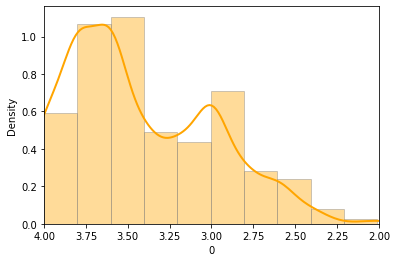

In [ ]:
ax = sns.distplot(dangii_df[0], hist=True, kde=True, bins=10, color='orange', hist_kws={'edgecolor': 'gray'}, kde_kws={'linewidth': 2})

ax.set_xlim(2,4)
ax.invert_xaxis()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



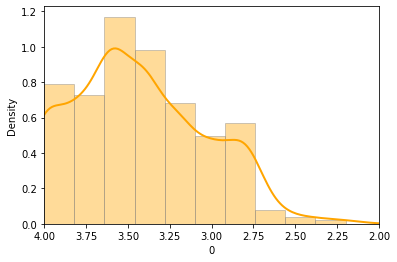

In [ ]:
ax = sns.distplot(dangii_df[0], hist=True, kde=True, bins=10, color='orange', hist_kws={'edgecolor': 'gray'}, kde_kws={'linewidth': 2})

ax.set_xlim(2,4)
ax.invert_xaxis()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



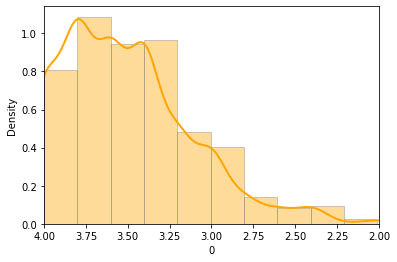

In [ ]:
ax = sns.distplot(dangii_df[0], hist=True, kde=True, bins=10, color='orange', hist_kws={'edgecolor': 'gray'}, kde_kws={'linewidth': 2})

ax.set_xlim(2,4)
ax.invert_xaxis()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



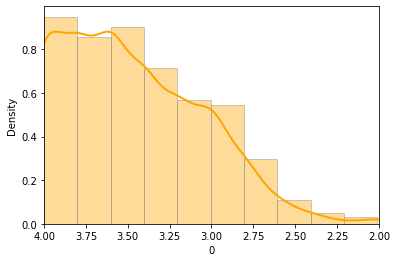

In [ ]:
ax = sns.distplot(dangii_df[0], hist=True, kde=True, bins=10, color='orange', hist_kws={'edgecolor': 'gray'}, kde_kws={'linewidth': 2})

ax.set_xlim(2,4)
ax.invert_xaxis()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



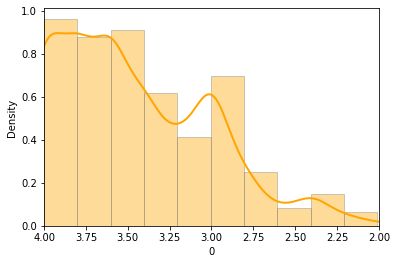

In [ ]:
ax = sns.distplot(dangii_df[0], hist=True, kde=True, bins=10, color='orange', hist_kws={'edgecolor': 'gray'}, kde_kws={'linewidth': 2})

ax.set_xlim(2,4)
ax.invert_xaxis()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



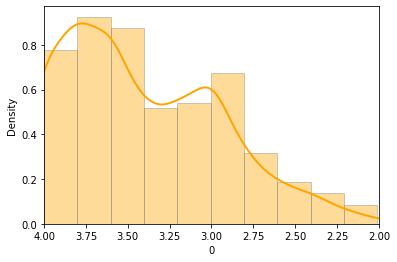

In [ ]:
ax = sns.distplot(dangii_df[0], hist=True, kde=True, bins=10, color='orange', hist_kws={'edgecolor': 'gray'}, kde_kws={'linewidth': 2})

ax.set_xlim(2,4)
ax.invert_xaxis()